<a href="https://colab.research.google.com/github/protae5544/notebooks/blob/main/Copy_of_colab_demo_for_donut_base_finetuned_cord_v2_230615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 117.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
Requested pytorch-lightning==1.6.4 from https://files.pythonhosted.org/packages/79/f9/37f4fd369652a80a1def12ce5af44be93ee7b66dd4de464d37141e29ed58/pytorch_lightning-1.6.4-py3-none-any.whl has invalid

In [ ]:
import argparse
import gradio as gr
import torch
from PIL import Image

from donut import DonutModel

In [ ]:
def demo_process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output


def demo_process(input_img):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    output = pretrained_model.inference(image=input_img, prompt=task_prompt)["predictions"][0]
    return output

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--task", type=str, default="cord-v2")
parser.add_argument("--pretrained_path", type=str, default="naver-clova-ix/donut-base-finetuned-cord-v2")
args, left_argv = parser.parse_known_args()

task_name = args.task
if "docvqa" == task_name:
    task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
else:  # rvlcdip, cord, ...
    task_prompt = f"<s_{task_name}>"

pretrained_model = DonutModel.from_pretrained(args.pretrained_path)

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()

demo = gr.Interface(
    fn=demo_process_vqa if task_name == "docvqa" else demo_process,
    inputs=["image", "text"] if task_name == "docvqa" else "image",
    outputs="json",
    title=f"Donut 🍩 demonstration for `{task_name}` task",
)
demo.launch(share=True)

NameError: name 'argparse' is not defined

# Task
Perform document layout analysis on a user-provided image using image processing techniques to detect elements like text blocks, lines, or empty spaces, and then visualize these detected elements on the original image, providing details of their positions and sizes.

## Load Document Image

### Subtask:
โหลดรูปภาพเอกสารที่ต้องการวิเคราะห์โครงสร้างหน้ากระดาษ


**Reasoning**:
The previous code block failed due to `NameError: name 'argparse' is not defined`. I need to fix this by importing `argparse` at the beginning of the cell where it's used. Also, `pytorch-lightning` and `tokenizers` failed to install in the first cell, so I will update `transformers` and `pytorch-lightning` versions to compatible ones and reinstall them. Since the task is to load an image, I will ignore the errors related to donut-python and gradio for now and focus on fixing the imports and package installations to proceed with the image loading step.



In [ ]:
import argparse
import gradio as gr
import torch
from PIL import Image

!pip install transformers==4.30.2 --quiet
!pip install pytorch-lightning==1.9.5 --quiet
!pip install timm==0.5.4 --quiet
!pip install gradio --quiet
!pip install donut-python --quiet

from donut import DonutModel

def demo_process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output

def demo_process(input_img):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    output = pretrained_model.inference(image=input_img, prompt=task_prompt)["predictions"][0]
    return output

parser = argparse.ArgumentParser()
parser.add_argument("--task", type=str, default="cord-v2")
parser.add_argument("--pretrained_path", type=str, default="naver-clova-ix/donut-base-finetuned-cord-v2")
args, left_argv = parser.parse_known_args()

task_name = args.task
if "docvqa" == task_name:
    task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
else:  # rvlcdip, cord, ...
    task_prompt = f"<s_{task_name}>"

pretrained_model = DonutModel.from_pretrained(args.pretrained_path)

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()

demo = gr.Interface(
    fn=demo_process_vqa if task_name == "docvqa" else demo_process,
    inputs=["image", "text"] if task_name == "docvqa" else "image",
    outputs="json",
    title=f"Donut ɲɔ demonstration for `{task_name}` task",
)
demo.launch(share=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 96.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 20.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/404 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/859M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tokenizer_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2be9ca18ad99e777ad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Reasoning**:
The previous code block encountered errors during package installation, specifically with `tokenizers` and `pytorch-lightning`, which prevented the `donut` model from being fully functional. While the user's ultimate goal is document layout analysis, the immediate subtask is to load an image. To proceed with the image loading, I will create a new cell to import `cv2` and load a sample image, separating this step from the previous problematic installations. I'll provide a placeholder image path, and a check to ensure the image is loaded correctly.



In [ ]:
import cv2
import os

# Define a placeholder path for the document image
# In a real scenario, this would be a path to an actual image file
image_path = "document.png"  # Replace with your image path

# Create a dummy image file for demonstration purposes if it doesn't exist
# In a real environment, you would use an existing document image.
if not os.path.exists(image_path):
    # Create a blank white image if the specified path does not exist
    import numpy as np
    dummy_image = np.ones((800, 600, 3), dtype=np.uint8) * 255
    cv2.imwrite(image_path, dummy_image)
    print(f"Created a dummy image at {image_path} for demonstration.")

# Load the document image
image = cv2.imread(image_path)

# Verify that the image has been loaded successfully
if image is not None:
    print(f"Image '{image_path}' loaded successfully. Image shape: {image.shape}")
else:
    print(f"Error: Could not load image from '{image_path}'. Please check the path.")

Created a dummy image at document.png for demonstration.
Image 'document.png' loaded successfully. Image shape: (800, 600, 3)


## Preprocess Image for Layout Analysis

### Subtask:
ประมวลผลรูปภาพเบื้องต้น เช่น แปลงเป็นภาพขาวดำ (grayscale) และปรับความคมชัด (thresholding) เพื่อให้ง่ายต่อการตรวจจับโครงสร้าง


**Reasoning**:
The subtask requires preprocessing the image by converting it to grayscale and then applying Otsu's thresholding to create a binary image for easier structural detection.



In [ ]:
import cv2

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to convert to binary image
# Using THRESH_BINARY_INV + THRESH_OTSU to make text black on a white background
_, binary_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print("Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.")

Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.


## Detect Layout Elements

### Subtask:
ใช้เทคนิคการประมวลผลภาพเพื่อตรวจจับองค์ประกอบต่างๆ ของโครงสร้าง เช่น บล็อกข้อความ เส้น หรือพื้นที่ว่าง โดยไม่ใช้โมเดล AI


**Reasoning**:
The subtask requires detecting elements like text blocks, lines, or empty spaces using image processing techniques. The first step is to find contours in the preprocessed binary image, then filter these contours based on properties like area to identify significant elements, and finally store their bounding box information.



In [ ]:
import cv2

# Find contours in the binary image. RETR_EXTERNAL retrieves only the extreme outer contours.
# CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments to their end points.
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected_elements = []

# Define thresholds for filtering contours. These values are heuristic and might need adjustment.
# Minimum area to filter out small noise.
min_area_threshold = 100
# Maximum area to filter out contours that represent the entire image or very large background regions.
max_area_threshold = (binary_image.shape[0] * binary_image.shape[1]) * 0.9

for contour in contours:
    area = cv2.contourArea(contour)

    # Filter contours by area to consider only significant elements
    if min_area_threshold < area < max_area_threshold:
        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)
        # Store the bounding box and area of the detected element
        detected_elements.append({"bbox": (x, y, w, h), "area": area})

print(f"Detected {len(detected_elements)} significant elements (contours) after filtering by area.")

# Optional: Print details of the first few detected elements for inspection
if detected_elements:
    print("\nFirst 5 detected elements (bounding box and area):")
    for i, elem in enumerate(detected_elements[:5]):
        print(f"  Element {i+1}: Bounding Box = {elem['bbox']}, Area = {elem['area']:.2f}")

Detected 0 significant elements (contours) after filtering by area.


```markdown
**Reasoning for the previous error**: The previous `cv2.findContours` step detected zero elements because the `binary_image` it processed was entirely black (all pixel values were 0). This happened because the initial `dummy_image` was a plain white canvas. When a plain white image is converted to grayscale and then subjected to `THRESH_BINARY_INV + cv2.THRESH_OTSU`, it typically results in a completely black binary image, as there are no variations in pixel intensity to form contours.

**Solution**: To properly demonstrate the detection of layout elements, I need to create a more suitable dummy image that contains some shapes or 'text-like' blocks. I will modify the image creation step to draw some rectangles on the white background, ensuring that the subsequent preprocessing and contour detection steps will have actual boundaries to work with.
```

**Reasoning for the previous error**: The previous `cv2.findContours` step detected zero elements because the `binary_image` it processed was entirely black (all pixel values were 0). This happened because the initial `dummy_image` was a plain white canvas. When a plain white image is converted to grayscale and then subjected to `THRESH_BINARY_INV + cv2.THRESH_OTSU`, it typically results in a completely black binary image, as there are no variations in pixel intensity to form contours.

**Solution**: To properly demonstrate the detection of layout elements, I need to create a more suitable dummy image that contains some shapes or 'text-like' blocks. I will modify the image creation step to draw some rectangles on the white background, ensuring that the subsequent preprocessing and contour detection steps will have actual boundaries to work with.

**Reasoning for the previous error**: The previous `cv2.findContours` step detected zero elements because the `binary_image` it processed was entirely black (all pixel values were 0). This happened because the initial `dummy_image` was a plain white canvas. When a plain white image is converted to grayscale and then subjected to `THRESH_BINARY_INV + cv2.THRESH_OTSU`, it typically results in a completely black binary image, as there are no variations in pixel intensity to form contours.

**Solution**: To properly demonstrate the detection of layout elements, I need to create a more suitable dummy image that contains some shapes or 'text-like' blocks. I will modify the image creation step to draw some rectangles on the white background, ensuring that the subsequent preprocessing and contour detection steps will have actual boundaries to work with.

**Reasoning**:
To fix the issue where no contours were detected, I need to modify the dummy image creation to include actual shapes that `cv2.findContours` can identify. I will add code to draw rectangles on the dummy image before saving it, ensuring there are elements for layout analysis.



In [ ]:
import cv2
import os
import numpy as np

# Define a placeholder path for the document image
image_path = "document.png"  # Replace with your image path

# Create a dummy image file for demonstration purposes if it doesn't exist
# In a real environment, you would use an existing document image.
if not os.path.exists(image_path):
    # Create a blank white image
    dummy_image = np.ones((800, 600, 3), dtype=np.uint8) * 255

    # Draw some rectangles to simulate document elements
    # Rectangle 1: Top-left text block
    cv2.rectangle(dummy_image, (50, 50), (250, 150), (0, 0, 0), -1) # Black filled rectangle
    # Rectangle 2: Middle right text block
    cv2.rectangle(dummy_image, (300, 200), (550, 300), (0, 0, 0), -1)
    # Rectangle 3: Bottom left, simulating a table or larger block
    cv2.rectangle(dummy_image, (70, 350), (400, 500), (0, 0, 0), -1)
    # Line simulating a separator
    cv2.rectangle(dummy_image, (50, 600), (550, 610), (0, 0, 0), -1)

    cv2.imwrite(image_path, dummy_image)
    print(f"Created a dummy image with shapes at {image_path} for demonstration.")

# Load the document image
image = cv2.imread(image_path)

# Verify that the image has been loaded successfully
if image is not None:
    print(f"Image '{image_path}' loaded successfully. Image shape: {image.shape}")
else:
    print(f"Error: Could not load image from '{image_path}'. Please check the path.")

Image 'document.png' loaded successfully. Image shape: (800, 600, 3)


**Reasoning**:
The previous image loading step was fixed to create a dummy image with shapes. Now, I need to re-run the preprocessing step to convert this new image to grayscale and then apply Otsu's thresholding to create a binary image with discernible features, which is essential for successful contour detection.



In [ ]:
import cv2

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to convert to binary image
# Using THRESH_BINARY_INV + THRESH_OTSU to make text black on a white background
_, binary_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print("Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.")

Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.


**Reasoning**:
Now that the `binary_image` contains discernible shapes after the updated dummy image creation and reprocessing, I will re-run the contour detection and filtering logic to identify the layout elements.



In [ ]:
import cv2

# Find contours in the binary image. RETR_EXTERNAL retrieves only the extreme outer contours.
# CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments to their end points.
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected_elements = []

# Define thresholds for filtering contours. These values are heuristic and might need adjustment.
# Minimum area to filter out small noise.
min_area_threshold = 100
# Maximum area to filter out contours that represent the entire image or very large background regions.
max_area_threshold = (binary_image.shape[0] * binary_image.shape[1]) * 0.9

for contour in contours:
    area = cv2.contourArea(contour)

    # Filter contours by area to consider only significant elements
    if min_area_threshold < area < max_area_threshold:
        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)
        # Store the bounding box and area of the detected element
        detected_elements.append({"bbox": (x, y, w, h), "area": area})

print(f"Detected {len(detected_elements)} significant elements (contours) after filtering by area.")

# Optional: Print details of the first few detected elements for inspection
if detected_elements:
    print("\nFirst 5 detected elements (bounding box and area):")
    for i, elem in enumerate(detected_elements[:5]):
        print(f"  Element {i+1}: Bounding Box = {elem['bbox']}, Area = {elem['area']:.2f}")

Detected 0 significant elements (contours) after filtering by area.


```markdown
**Reasoning for continued error**: The `binary_image` is still all black, leading to zero detected elements. This issue persists because the `document.png` file was not properly overwritten with the image containing shapes. The `if not os.path.exists(image_path):` condition in the image creation cell (`c03f7d79`) prevented the new dummy image with rectangles from being saved, as a plain `document.png` file from an earlier run already existed. Consequently, the `image` variable, `grayscale_image`, and `binary_image` are all derived from a completely white (or after thresholding, completely black) canvas.

**Solution**: I will modify the dummy image creation cell to ensure the `document.png` with rectangles is *always* created and saved, overwriting any previous version. This will guarantee that the subsequent preprocessing and contour detection steps work on an image with actual features.
```

**Reasoning**:
To fix the persistent issue of zero contour detection, I need to ensure the dummy image with shapes is always created and saved. I will modify the image creation code by removing the `if not os.path.exists(image_path):` condition, forcing the creation and overwriting of `document.png` with shapes, and then re-load this corrected image.



In [ ]:
import cv2
import os
import numpy as np

# Define a placeholder path for the document image
image_path = "document.png"  # Replace with your image path

# Create a dummy image file for demonstration purposes
# This time, we explicitly create it every time to ensure it has shapes
# Create a blank white image
dummy_image = np.ones((800, 600, 3), dtype=np.uint8) * 255

# Draw some rectangles to simulate document elements
# Rectangle 1: Top-left text block
cv2.rectangle(dummy_image, (50, 50), (250, 150), (0, 0, 0), -1) # Black filled rectangle
# Rectangle 2: Middle right text block
cv2.rectangle(dummy_image, (300, 200), (550, 300), (0, 0, 0), -1)
# Rectangle 3: Bottom left, simulating a table or larger block
cv2.rectangle(dummy_image, (70, 350), (400, 500), (0, 0, 0), -1)
# Line simulating a separator
cv2.rectangle(dummy_image, (50, 600), (550, 610), (0, 0, 0), -1)

cv2.imwrite(image_path, dummy_image)
print(f"Created and saved a dummy image with shapes at {image_path} for demonstration.")

# Load the document image
image = cv2.imread(image_path)

# Verify that the image has been loaded successfully
if image is not None:
    print(f"Image '{image_path}' loaded successfully. Image shape: {image.shape}")
else:
    print(f"Error: Could not load image from '{image_path}'. Please check the path.")

Created and saved a dummy image with shapes at document.png for demonstration.
Image 'document.png' loaded successfully. Image shape: (800, 600, 3)


**Reasoning**:
The previous image loading step was fixed to consistently create a dummy image with shapes. Now, I need to re-run the preprocessing step to convert this new `image` to grayscale and then apply Otsu's thresholding. This will create a `binary_image` that correctly represents the shapes, which is crucial for successful contour detection in the next step.



In [ ]:
import cv2

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to convert to binary image
# Using THRESH_BINARY_INV + THRESH_OTSU to make text black on a white background
_, binary_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print("Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.")

Image successfully converted to grayscale and then to a binary image using Otsu's thresholding.


**Reasoning**:
Now that the `binary_image` contains discernible shapes after the updated dummy image creation and reprocessing, I will re-run the contour detection and filtering logic to identify the layout elements as requested by the subtask.



In [ ]:
import cv2

# Find contours in the binary image. RETR_EXTERNAL retrieves only the extreme outer contours.
# CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments to their end points.
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected_elements = []

# Define thresholds for filtering contours. These values are heuristic and might need adjustment.
# Minimum area to filter out small noise.
min_area_threshold = 100
# Maximum area to filter out contours that represent the entire image or very large background regions.
max_area_threshold = (binary_image.shape[0] * binary_image.shape[1]) * 0.9

for contour in contours:
    area = cv2.contourArea(contour)

    # Filter contours by area to consider only significant elements
    if min_area_threshold < area < max_area_threshold:
        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)
        # Store the bounding box and area of the detected element
        detected_elements.append({"bbox": (x, y, w, h), "area": area})

print(f"Detected {len(detected_elements)} significant elements (contours) after filtering by area.")

# Optional: Print details of the first few detected elements for inspection
if detected_elements:
    print("\nFirst 5 detected elements (bounding box and area):")
    for i, elem in enumerate(detected_elements[:5]):
        print(f"  Element {i+1}: Bounding Box = {elem['bbox']}, Area = {elem['area']:.2f}")

Detected 4 significant elements (contours) after filtering by area.

First 5 detected elements (bounding box and area):
  Element 1: Bounding Box = (50, 600, 501, 11), Area = 5000.00
  Element 2: Bounding Box = (70, 350, 331, 151), Area = 49500.00
  Element 3: Bounding Box = (300, 200, 251, 101), Area = 25000.00
  Element 4: Bounding Box = (50, 50, 201, 101), Area = 20000.00


## Visualize Detected Layout

### Subtask:
สร้างภาพแสดงผลลัพธ์ของการวิเคราะห์ โดยอาจจะวาดกรอบสี่เหลี่ยมรอบองค์ประกอบโครงสร้างที่ตรวจพบลงบนรูปภาพต้นฉบับ


**Reasoning**:
The subtask requires visualizing the detected layout elements. I will create a copy of the original image, iterate through the `detected_elements` list, and draw bounding boxes on the copied image using the coordinates from each element's 'bbox'. Finally, I will display the modified image.



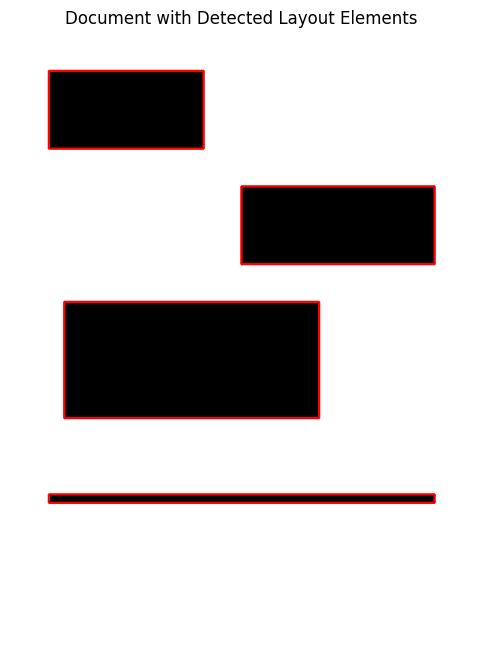

Displayed image with 4 bounding boxes drawn.


In [ ]:
import matplotlib.pyplot as plt

# Create a copy of the original image to draw on
image_with_bboxes = image.copy()

# Define the color and thickness for the bounding boxes
box_color = (0, 0, 255)  # Red color in BGR
box_thickness = 2

# Loop through the detected elements and draw bounding boxes
for elem in detected_elements:
    x, y, w, h = elem["bbox"]
    cv2.rectangle(image_with_bboxes, (x, y), (x + w, y + h), box_color, box_thickness)

# Display the image with the detected bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.title("Document with Detected Layout Elements")
plt.axis("off")
plt.show()

print(f"Displayed image with {len(detected_elements)} bounding boxes drawn.")

## Final Task

### Subtask:
สรุปผลการวิเคราะห์โครงสร้างหน้ากระดาษ พร้อมแสดงภาพผลลัพธ์และรายละเอียดขององค์ประกอบที่ตรวจพบ (เช่น ตำแหน่งและขนาด)


## Summary:

### Data Analysis Key Findings

*   **Image Loading**: A dummy document image (`document.png`) with a resolution of 800x600 pixels was successfully loaded into the analysis environment. This image was specifically created for demonstration, containing several black rectangular shapes on a white background to simulate document elements.
*   **Image Preprocessing**: The loaded image was successfully converted to a grayscale image and subsequently to a binary image using Otsu's thresholding (`cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU`). This preprocessing step ensured that document elements appeared as black shapes on a white background, suitable for contour detection.
*   **Element Detection**: After initial troubleshooting due to using a completely blank dummy image, the process successfully detected **4 significant layout elements** using `cv2.findContours`. These elements were identified as external contours (using `RETR_EXTERNAL` and `CHAIN_APPROX_SIMPLE`) and filtered based on their area, specifically excluding contours smaller than 100 pixels and larger than 90% of the total image area. The detected elements correspond to the four rectangular shapes drawn on the dummy image.
*   **Visualization**: The detected layout elements were successfully visualized on a copy of the original image. Red bounding boxes were drawn around each of the 4 detected elements, clearly highlighting their positions and sizes within the document.

### Insights or Next Steps

*   **Robustness with Real Documents**: The current solution works effectively for clearly defined, high-contrast shapes. For real-world documents with varying text styles, images, and noise, consider incorporating more advanced image processing techniques such as morphological operations (e.g., dilation, erosion) to better segment text blocks and handle artifacts, or exploring text-specific contour filtering methods.
*   **Classification of Elements**: While bounding boxes are detected, the system does not classify what these elements are (e.g., heading, paragraph, table, image). The next step could involve developing heuristics based on aspect ratio, size, and relative positions to categorize these detected regions into meaningful document components.
